# Automated PDF Text Search and Analyzer (For Multiple PDF Files)
Prepared by Hiro Yokoi, July 15, 2019<br><br>
This is the bulk PDF analyzer to ease **text search** for **Portfolio Review and Analysis (PRA)** for managing urban spatial growth.

**What you have to do**
- All you have to do is to (1) input your UPI and (2) store all the PDFs in a folder on your desktop.
- If you want to change the search text, you can change the String part like `String = ['aaa', 'bbb', 'ccc', 'ddd']`. Be sure to type the **lower case** character. Text search is case sensitive.

### Import packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PyPDF2, textract, re, os
from matplotlib.ticker import MaxNLocator
import glob
%matplotlib inline
#from textblob import TextBlob
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#import nltk
#nltk.download('punkt')

<div class="alert alert-block alert-info">
<b>Note:</b>
    <br>When you install <b>textract</b> on your Windows computer, it will return an error. You need to execute following steps.<br>
- <b>1.</b> you need to install Microsoft Visual Studio C++ Compiler for Python. You need to download and install <b>Visual Studio Community</b> at https://visualstudio.microsoft.com/downloads/#build-tools-for-visual-studio-2017.<br>
- <b>2.</b> run following command line: <b>python -m pip install --upgrade pip setuptools wheel</b><br>
- <b>3.</b> run follwoing command line: <b>pip install six --upgrade</b><br>
- <b>4.</b> download EbookLib version 0.15 because textract has dependence on EbookLib version 0.15.After downloading the zip file at <b>https://github.com/aerkalov/ebooklib/releases</b>, unzipping it, and <b>manually revove the unicode character in the README.md file.</b><br>(unicode char is on <b>Line 44</b>. You can edit the file with text editter like notepad or Atom)<br>
- <b>5.</b> run following command line: <b>conda install swig</b><br>
- <b>6.</b> change the working directory to the unzipped Ebooklib folder: e.g. <b>cd C:\Users\username\Desktop\ebooklib-0.15</b><br>
- <b>7.</b> run the command to install EbookLib : <b>pip install .</b><br>
- <b>8.</b> run the textract installation : <b>pip install textract</b><br>
(Reference: https://stackoverflow.com/questions/50743723/cant-install-textract-on-windows)
</div>

### Your Manual Input
#### VERY IMPORTANT! Before runnning a command, manually create a blank folder on your desktop, change the name of the folder to "PDF", locate your PDF files in the folder.

Type your UPI, then hit Enter.

In [3]:
UPI = input('Please type your UPI number: ')

Please type your UPI number: 535782


Make sure your folder path and file name is correct.

In [4]:
pdf_dir = r'C:\Users\wb' + str(UPI) + '\Desktop\PRA\PDF'
pdf_files = glob.glob("%s/*.pdf" % pdf_dir)
print('Your folder path is:', pdf_dir)
print('Printing the file path of the first 5 files',pdf_files[:5])

Your folder path is: C:\Users\wb535782\Desktop\PRA\PDF
Printing the file path of the first 5 files ['C:\\Users\\wb535782\\Desktop\\PRA\\PDF\\P006449_ICR.pdf', 'C:\\Users\\wb535782\\Desktop\\PRA\\PDF\\P006449_ICRR.pdf', 'C:\\Users\\wb535782\\Desktop\\PRA\\PDF\\P006449_PAD.pdf', 'C:\\Users\\wb535782\\Desktop\\PRA\\PDF\\P006572_PAD.pdf', 'C:\\Users\\wb535782\\Desktop\\PRA\\PDF\\P039199_ICR.pdf']


The cell below is a backup when the above does not work.

In [5]:
#pdf_dir = r"C:\Users\wb535782\Desktop\PRA\PDF"
#pdf_files = glob.glob("%s/*.pdf" % pdf_dir)
#print('Printing the file path of the first 5 files',pdf_files[:5])

### Extract text from all the PDF files

In [6]:
lst_cap, lst_low, lst_file = [], [], []

for pdf_file in pdf_files:
    
    # Open the pdf file
    pdfFileObj = open(pdf_file,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

    # Discern the number of pages, so that search all the pages.
    num_pages = pdfReader.numPages

    # Extract text in each page.
    count = 0
    text = ""
    
    while count < num_pages:
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()

    # the condictional statement provides either the computer written document if its yes or the OCR scanned document if its no.
    if text != "":
        text = text
    else:
        text = textract.process(pdf_file, method='tesseract', language='eng')

    # Clean text by removing new page, tab, double white space.
    text = text.replace('\n','').replace('\t', '')
    text = " ".join(text.split())
    lst_cap.append(text)
    
    # make a list of lower case text
    text_lower = text.lower()
    lst_low.append(text_lower)
    
    # make a list of files
    lst_file.append(pdf_file)

# Develop dataframe
multi_file_df = pd.DataFrame({'file_name':lst_file, 'text_cap':lst_cap, 'text_lower':lst_low})
multi_file_df.head()

,file_name,text_cap,text_lower
0,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICR.pdf,Document of The World Bank Report No: ICR1973 ...,document of the world bank report no: icr1973 ...
1,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICRR...,"ICR Review1. Project Data: ˚˜ ˝˚˚˜˘˘(----./0,....","icr review1. project data: ˚˜ ˝˚˚˜˘˘(----./0,...."
2,C:\Users\wb535782\Desktop\PRA\PDF\P006449_PAD.pdf,Document ofThe World BankReport No: 19873-BRPR...,document ofthe world bankreport no: 19873-brpr...
3,C:\Users\wb535782\Desktop\PRA\PDF\P006572_PAD.pdf,Document ofThe World BankReport No: 23514PROJE...,document ofthe world bankreport no: 23514proje...
4,C:\Users\wb535782\Desktop\PRA\PDF\P039199_ICR.pdf,i Document of The World Bank Report No: ICR000...,i document of the world bank report no: icr000...


### Define search phrases

In [7]:
search_phrases = [
    'raise awareness',
    'regulatory reform',
    'institutional capacity',
    'policy reform',
    'informal settlement',
    'urban',
    'peri-urban',
    'municipal',
    'gender',
    'poverty map',
    'land governance assessment framework',
    'country diagnostics',
    'annual land and poverty conference',
    'land market assessment course',
    'urbanization review',
    'city development strategies',
    'city development strategy',
    'urbanization review',
    'urban research symposium',
    'land use planning course',
    'land market assessment toolkits',
    'tod implementation resources',
    'transforming transportation conference',
    'tokyo distance learning center',
    'leaders in urban transport planning course',
    'land readjustment course',
    'approaches to urban slums',
    'street addressing',
    'street addressing and the management of cities course',
    'upgrading urban informal settlements course',
    'cadastre law',
    'cadaster law',
    'cadastre modernization',
    'cadaster modernization',
    'cadaster',
    'cadastre',
    'property rights',
    'titling',
    'land use',
    'land acquisition',
    'land assembly regulation',
    'property tax',
    'public land management',
    'expropriation mechanism',
    'land readjustment regulatory framework',
    'public-private investment',
    'separation and clarity of institutional mandates',
    'participatory practice',
    'metropolitan',
    'multi-use cadaster',
    'multi-use cadastre',
    'multi use cadaster',
    'multi use cadastre',
    'integrated cadaster',
    'integrated cadastre',
    'hardware',
    'equipment',
    'software',
    'database',
    'management information system',
    'geospatial data',
    'geospatial',
    'geographic information system',
    'innovation',
    'innovative technology',
    'land allocated for public infrastructure',
    'delineation',
    'regulated land use',
    'building code',
    'monitoring land use',
    'land use monitoring',
    'map',
    'land use planning',
    'planning professionals',
    'universities',
    'university',
    'academia',
    'spatial planning',
    'spatial',
    'satellite',
    'participatory urban and territorial planning',
    'mapping sysytem',
    'national planning agencies',
    'national planning agency',
    'urban plan',
    'territorial plan',
    'institutional arrangement',
    'transit oriented development',
    'transport-led land use',
    'highway',
    'road',
    'slum upgrading',
    'slum',
    'land readjustment',
    'land development',
    'upgrade',
    'upgrading',
    'rehabilitation',
    'modernization',
    'consolidating',
    'consolidate',
    'land value',
    'land value capture']

search_phrases_capital = [
    'GIS',
    'LGAF',
    'TDLC',
    'NGO',
    'CSO',
    'PPP',
    'TOD',
    'LVC'
]

### Search keywords in each PDF file

Define a function to extract keywords.

In [8]:
def phrase_search(filename, text_capital, text_lowered):
    
    # Search capital sensitive texts.
    counter_cap = 0
    dicts_cap = {}

    for phrase in search_phrases_capital:
        if phrase in text_capital:
            counter_cap = text_capital.count(phrase)
            dicts_cap[phrase] = counter_cap
        
    # Search small capital texts.
    counter_sc = 0
    dicts_sc = {}

    for phrase in search_phrases:
        if phrase in text_lowered:
            counter_sc = text_lowered.count(phrase)
            dicts_sc[phrase] = counter_sc

    # Merge two search results into one dictionary
    def merge_dict(dict1, dict2): 
        res = {**dict1, **dict2} 
        return res
    dict_both = merge_dict(dicts_cap, dicts_sc)
    
    return dict_both

Apply the above function to each file.

In [9]:
# Apply the above function to multi_file_df
new_text = multi_file_df.apply(lambda row: phrase_search(row['file_name'], row['text_cap'], row['text_lower']), axis = 1)

# Create dataframe of new_text
new_text_df = pd.DataFrame(new_text, columns = ['keywords'])

# merge multi_file_df and new_text_df
merged = pd.merge(multi_file_df['file_name'], new_text_df, left_index=True, right_index=True)
merged.head()

,file_name,keywords
0,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICR.pdf,"{'NGO': 1, 'institutional capacity': 1, 'polic..."
1,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICRR...,{}
2,C:\Users\wb535782\Desktop\PRA\PDF\P006449_PAD.pdf,"{'NGO': 6, 'urban': 22, 'land use': 5, 'metrop..."
3,C:\Users\wb535782\Desktop\PRA\PDF\P006572_PAD.pdf,"{'GIS': 1, 'NGO': 47, 'regulatory reform': 1, ..."
4,C:\Users\wb535782\Desktop\PRA\PDF\P039199_ICR.pdf,"{'NGO': 5, 'raise awareness': 2, 'regulatory r..."


Spliting merged dataframe by fine_name and keywords

In [10]:
# Split the keys and values
key_bag, value_bag, id_bag = [], [], []
for index, row in merged.iterrows():
    value_bag.append(row['keywords'].values())
    key_bag.append(row['keywords'].keys())
    id_bag.append(row['file_name'])

temp_df = pd.DataFrame({'file':id_bag, 'keys':key_bag, 'values':value_bag})

# Then, splitting the dataframe
row_bag_key, id_bag_key = [], []
row_bag_value, id_bag_value = [], []
for index, row in temp_df.iterrows():
    bag_of_keys = row['keys']
    bag_of_value = row['values']
    for individual_key in bag_of_keys:
        row_bag_key.append(row)
        id_bag_key.append(individual_key)
    for individual_value in bag_of_value:
        row_bag_value.append(row)
        id_bag_value.append(individual_value)
tidied_df = pd.DataFrame(row_bag_key)
tidied_df['keys'] = id_bag_key
tidied_df['values'] = id_bag_value
tidied_df = tidied_df.reset_index()
print('Number of Row and Column is {}.'.format(tidied_df.shape))
tidied_df.head()

Number of Row and Column is (436, 4).


,index,file,keys,values
0,0,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICR.pdf,NGO,1
1,0,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICR.pdf,institutional capacity,1
2,0,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICR.pdf,policy reform,1
3,0,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICR.pdf,urban,28
4,0,C:\Users\wb535782\Desktop\PRA\PDF\P006449_ICR.pdf,titling,4


### Term Frequency Analysis

In [11]:
keys_grouped = tidied_df.groupby('keys').agg({'values':'sum'}).sort_values(by = 'values', ascending = False).reset_index()
keys_grouped.head()

,keys,values
0,urban,803
1,road,689
2,equipment,309
3,highway,308
4,rehabilitation,274


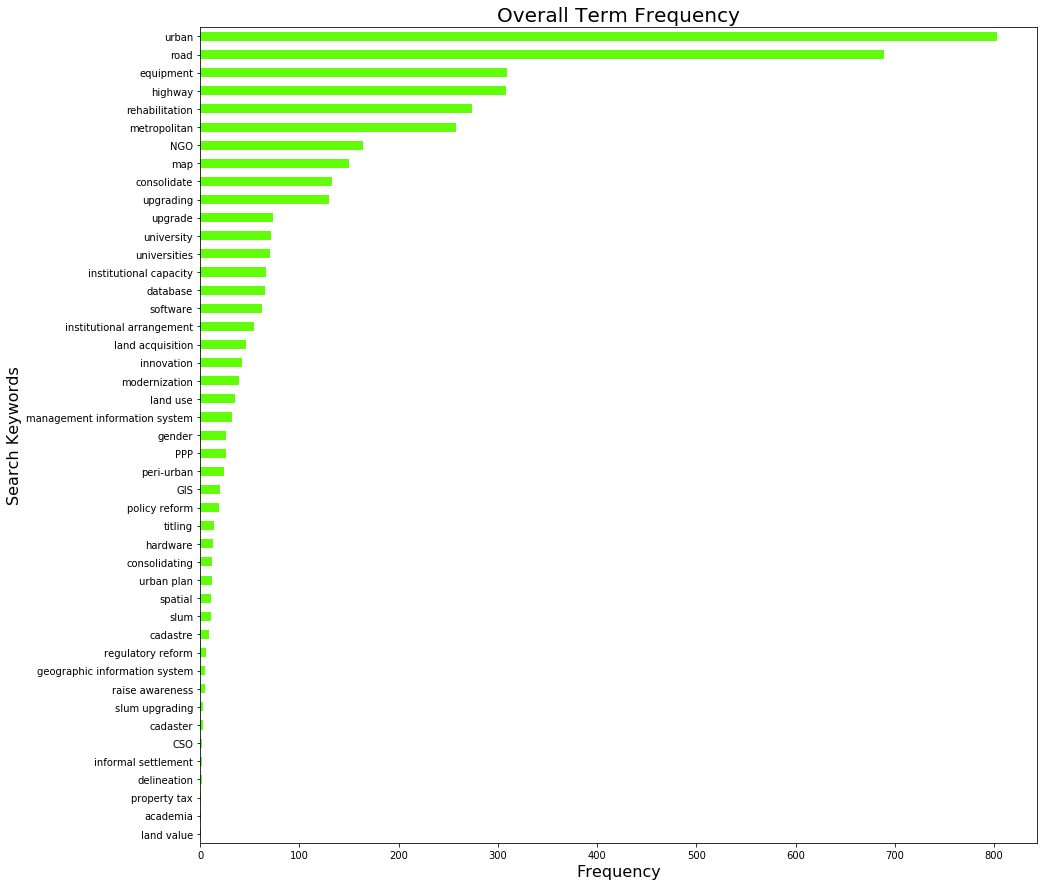

In [12]:
# Make bar plot
ax = keys_grouped.sort_values(by = 'values', ascending = True).plot.barh(figsize = [15,15], x = 'keys', y = 'values', color = '#62FD08', legend = False)
plt.xlabel('Frequency', fontsize = 16)
plt.ylabel('Search Keywords', fontsize = 16)
plt.title('Overall Term Frequency', fontsize = 20)
ax.xaxis.set_major_locator(MaxNLocator(integer = True))

### Time Series Analysis

In [13]:
# Backup for my personal use
csv_path = r'C:\Users\wb535782\Desktop\PRA'
csv_file_name = r'Case Study Countries Portfolio FY00-18 sent to team 6-25-19.csv'
csv_path = os.path.join(csv_path, csv_file_name)

In [14]:
portfolio = pd.read_csv(csv_path, parse_dates= ['Fiscal year'])
#portfolio = portfolio.loc[:, ['Proj ID', 'Proj Name', 'Fiscal year', 'Exit FY', 'Region', 'Practice']]
portfolio.head(2)

,Proj ID,Proj Name,Fiscal year,Exit FY,Country,Region,Practice,Prod Line,Project Status,AF,Par Proj ID,IBRD+IDA+Grant Amt,Abstract,PAD URL,ICR URL,ICRR_PPAR URL,Eval Type,Eval FY,IEG Outcome Rating,Reviewer
0,P077533,Emergency Community Empowerment Project,2002-01-01,2005,Afghanistan,SAR,Soc. Urb. Rur.& GP,IBRD/IDA,Closed,#,#,42,The Emergency Community Empowerment and Public...,http://imagebank.worldbank.org/servlet/WDSCont...,http://imagebank.worldbank.org/servlet/WDSCont...,http://imagebank.worldbank.org/servlet/WDSCont...,ES,2006.0,SATISFACTORY,TK
1,P077779,Emergency Infrastructure Reconstruction,2002-01-01,2006,Afghanistan,SAR,Water,IBRD/IDA,Closed,#,#,33,The objective of the Emergency Infrastructure ...,http://imagebank.worldbank.org/servlet/WDSCont...,http://imagebank.worldbank.org/servlet/WDSCont...,http://imagebank.worldbank.org/servlet/WDSCont...,ES,2007.0,SATISFACTORY,TK
